In [64]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('C:/Users/Jawad Khan/Downloads/spam_or_not_spam.csv')

# Display the first few rows of the dataset
print(dataset.tail(5))


                                                  email  label
2995   abc s good morning america ranks it the NUMBE...      1
2996   hyperlink hyperlink hyperlink let mortgage le...      1
2997   thank you for shopping with us gifts for all ...      1
2998   the famous ebay marketing e course learn to s...      1
2999   hello this is chinese traditional 子 件 NUMBER世...      1


In [65]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset


# Handle missing values
dataset['email'].fillna("", inplace=True)

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Preprocess function
def preprocess_text(email):
    # Tokenize the text
    tokens = word_tokenize(email)
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove stopwords and punctuations
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
    
    # Rejoin tokens into cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply preprocessing to the 'email' column of the dataset
dataset['cleaned_text'] = dataset['email'].apply(preprocess_text)

# Display the preprocessed text
print(dataset['cleaned_text'].tail())


2995    abc good morning america ranks number christma...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping us gifts occasions free gift nu...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional 子 件 number世 o最有效的宣 鞣...
Name: cleaned_text, dtype: object


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

# Load the preprocessed dataset


# Split the dataset into features (X) and target (y)
X = dataset['cleaned_text']
y = dataset['label']  # Assuming 'label' is the column containing spam/ham labels

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform text data to TF-IDF features
X_tfidf = vectorizer.fit_transform(X)

# Perform feature selection using SelectKBest and f_classif
num_features_to_select = 100  # Number of features to select
feature_selector = SelectKBest(f_classif, k=num_features_to_select)
X_selected = feature_selector.fit_transform(X_tfidf, y)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = [vectorizer.get_feature_names_out()[i] for i in selected_feature_indices]

# Display the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: ['_______________________________________________', 'address', 'assistance', 'available', 'business', 'buy', 'call', 'cash', 'click', 'combined', 'communication', 'company', 'compliance', 'contact', 'credit', 'date', 'days', 'dear', 'deposit', 'destructive', 'dollars', 'easily', 'email', 'fax', 'fill', 'financial', 'form', 'free', 'fund', 'future', 'guaranteed', 'hours', 'http', 'hyperlink', 'includes', 'income', 'information', 'instructions', 'insurance', 'interest', 'investment', 'legal', 'limited', 'low', 'lowest', 'mailings', 'marketing', 'million', 'money', 'mortgage', 'motivated', 'name', 'obligation', 'offer', 'offers', 'online', 'opportunity', 'opt', 'opted', 'order', 'packed', 'please', 'price', 'prices', 'private', 'products', 'professional', 'professionals', 'profitable', 'promotion', 'purchase', 'rate', 'rates', 'receive', 'registered', 'removal', 'remove', 'removed', 'reply', 'request', 'required', 'retail', 'risk', 'save', 'services', 'shipping', 'since

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix



# Split the dataset into features (X) and target (y)
X = dataset['cleaned_text']
y = dataset['label']  # Assuming 'label' is the column containing spam/ham labels

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = naive_bayes.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.87
Confusion Matrix:
 [[745   0]
 [117  38]]


Accuracy: 0.905
Confusion Matrix:
 [[513   0]
 [ 57  30]]


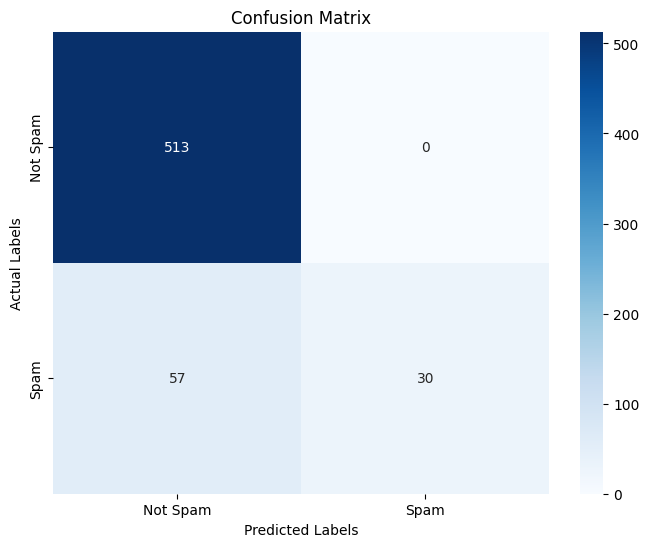

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load and preprocess your dataset
# ...

# Split the dataset into features (X) and target (y)
X = dataset['cleaned_text']
y = dataset['label']  # Assuming 'label' is the column containing spam/ham labels

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=30)

# Train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = naive_bayes.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()



In [62]:
# ...

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)

# ...


Accuracy: 0.905
